<a href="https://colab.research.google.com/github/pascal-maker/Python/blob/master/Labo_08_Niet_stationaire_tijdsreeksen_PascalMusabyimanapynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:darkorange"> Niet stationaire tijdsreeksen opgave


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
# %matplotlib inline
# plt.style.use('seaborn')
# sns.set_style("darkgrid")

## <span style="color:deeppink"> CO<sup>2</sup> uitstoot </span>

De dataset CO<sup>2 </sup> bevat historische gegevens van de wereldwijde CO<sup>2 </sup>  uitstoot, die mede verantwoordelijk zou zijn voor de opwarming van de aarde. De uitstoot wordt gegeven in Gigaton (miljard ton = duizend miljard kilogram).

Laad het bestand `CO2.csv` in als de dataset, gebruik de kolom jaar als de index kolom

In [ ]:
dataset = pd.read_csv('/content/CO2.csv',index_col= 'Jaar')
dataset.head()

,Uitstoot CO2 (Gigaton)
Jaar,
1975,15.54
1976,16.37
1977,16.93
1978,17.44
1979,17.96


Maak een grafiek van deze tijdreeks

Text(0, 0.5, 'Uitstoot CO2 (Gigaton)')

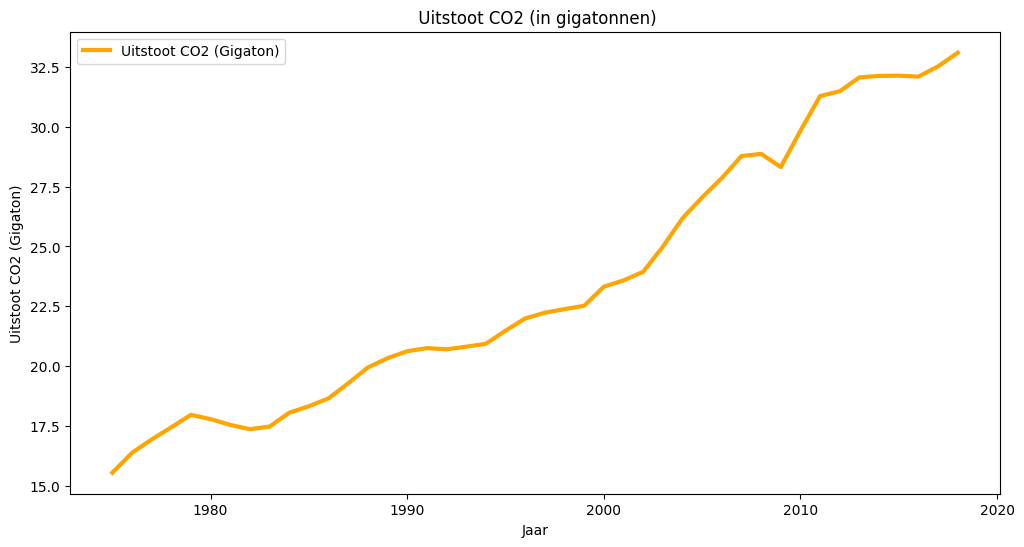

In [ ]:
dataset.plot(color='orange',linewidth=3,figsize=(12,6))
plt.title(' Uitstoot CO2 (in gigatonnen)')
plt.xlabel("Jaar")
plt.ylabel("Uitstoot CO2 (Gigaton)")

Ga na of er een lineaire trend aanwezig is en of deze dat al dan niet stationair is.

In [ ]:
from sklearn import datasets,linear_model
x = dataset.index.values
y = dataset['Uitstoot CO2 (Gigaton)'].values
regressionline = linear_model.LinearRegression()
regressionline.fit(x.reshape(-1,1),y)

print('Intercept =', regressionline.intercept_ )
print('Richtingscoëfficiënt = ', regressionline.coef_[0])

Intercept = -809.6158985200843
Richtingscoëfficiënt =  0.4172762508809019


<Axes: xlabel='Jaar'>

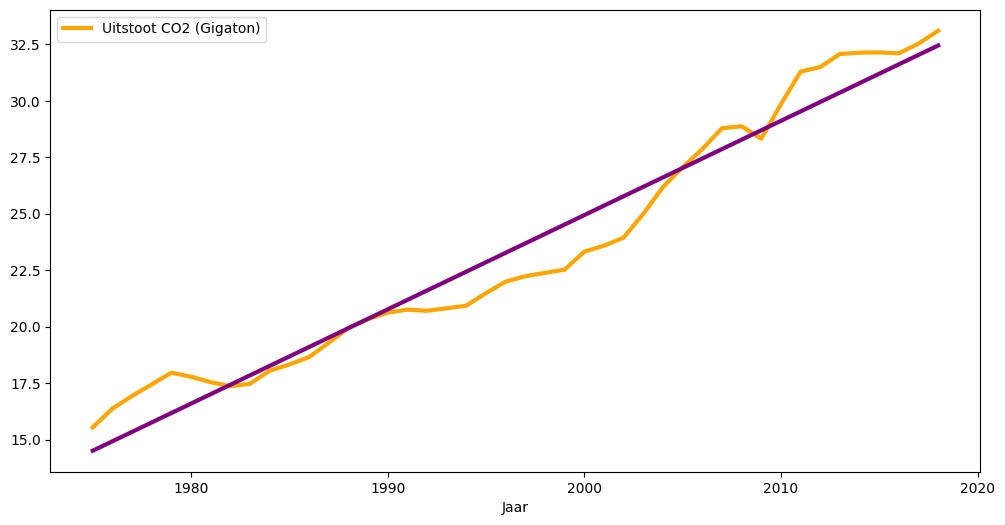

In [ ]:
dataset.plot(color='orange',linewidth=3,figsize=(12,6))
sns.lineplot(x=x,y=regressionline.predict(x.reshape(-1,1)),color='purple',linewidth=3)

In [ ]:
dataset['trendlijn'] = dataset.index*regressionline.coef_[0] + regressionline.intercept_
dataset.head()

,Uitstoot CO2 (Gigaton),trendlijn
Jaar,,
1975,15.54,14.504697
1976,16.37,14.921973
1977,16.93,15.339249
1978,17.44,15.756526
1979,17.96,16.173802


Verwijder de trend uit de data zodat je de residuen bekomt.

In [ ]:
dataset['residuen'] = dataset['Uitstoot CO2 (Gigaton)'] - dataset['trendlijn']
dataset.head()

,Uitstoot CO2 (Gigaton),trendlijn,residuen
Jaar,,,
1975,15.54,14.504697,1.035303
1976,16.37,14.921973,1.448027
1977,16.93,15.339249,1.590751
1978,17.44,15.756526,1.683474
1979,17.96,16.173802,1.786198


Maak een plot van de residuen en controleer of de residuen stationair zijn via het toevoegen van een trendlijn

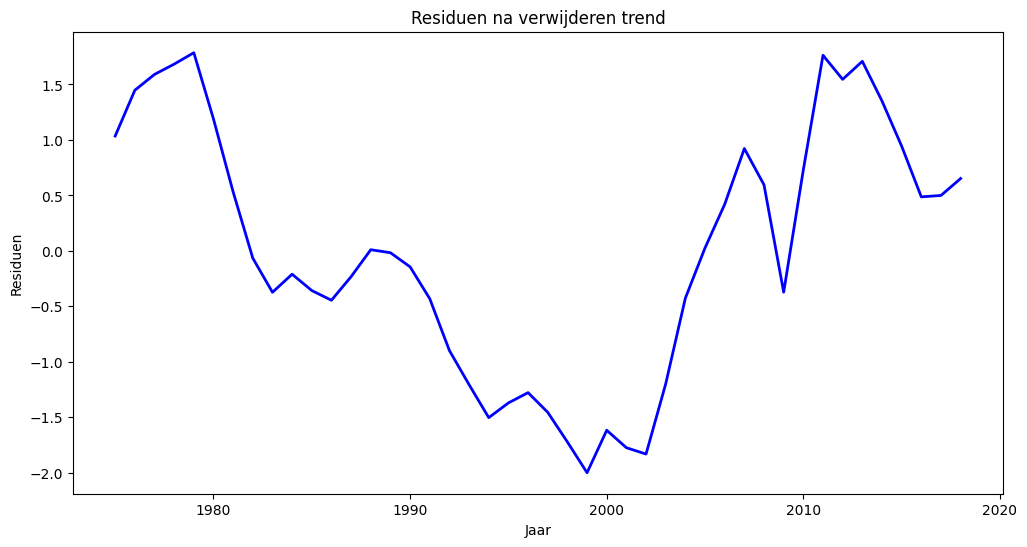

In [20]:
# 6. Maak een plot van de residuen
dataset['residuen'].plot(color='blue', linewidth=2, figsize=(12,6))
plt.title('Residuen na verwijderen trend')
plt.xlabel('Jaar')
plt.ylabel('Residuen')
plt.show()

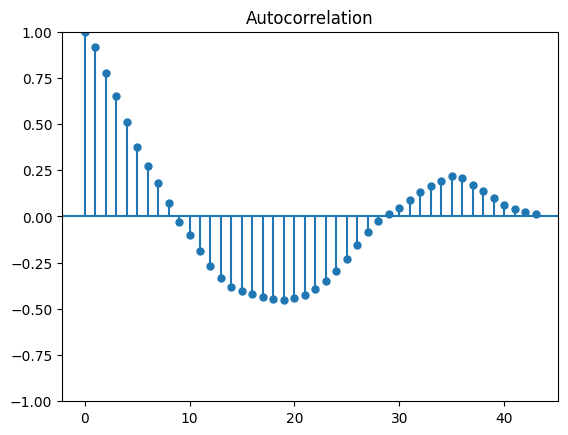

In [ ]:
fig = plot_acf(dataset['residuen'],lags=len(dataset) -1,alpha=None)

Gebruik moving average en exponentiële demping om het residu van 2019 te voorspellen. Voorspel ook eenvoudigweg op basis van de trendlijn. Zoek de optimale alpha wanneer je gebruik maakt van exponentiele demping. Kies de beste voorspellingsmethode op basis van de MAE (Mean Average Error).

The lowest MAE is:  0.34353090122425756 index: 
alpha:  1.0
The lowest MAE is:  0.34353090122425756 index: 
alpha:  1.0


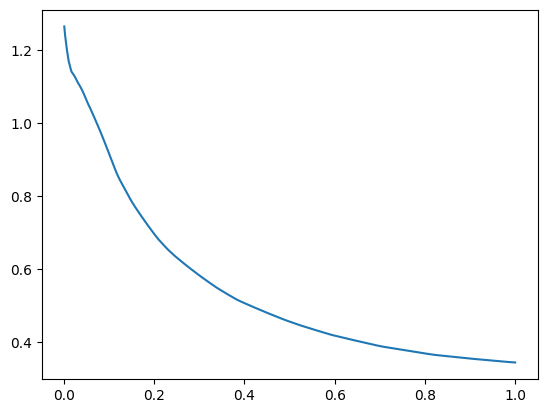

In [33]:
step = 1e-3
alphas = np.arange(start=0,stop=1+step,step = step)
df = pd.DataFrame()
mae =  []
for alpha in alphas[1:]:
  exponential = []
  exponential = dataset['residuen'].ewm(alpha=alpha,adjust=False).mean().shift(1)
  mae.append(abs(dataset['residuen'] - exponential).mean())

df['mae'] = mae
df.set_index(alphas[1:],inplace=True)
df.index.name = 'Alpha'

minimum_mae = df['mae'].min()
print("The lowest MAE is: ", minimum_mae, "index: ")
print("alpha: ", df[df['mae'] == minimum_mae].index[0])
beste_alpha = df[df['mae'] == minimum_mae].index[0]  # <-- deze regel toevoegen!
print("The lowest MAE is: ", minimum_mae, "index: ")
print("alpha: ", beste_alpha)

plt.plot(df['mae'])


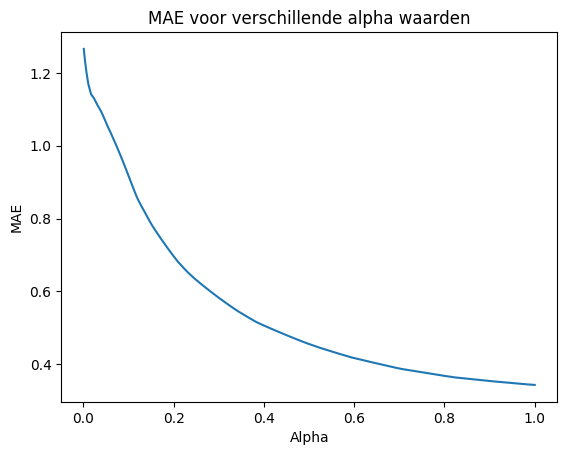

In [34]:
# Plot MAE
plt.plot(df['mae'])
plt.title('MAE voor verschillende alpha waarden')
plt.xlabel('Alpha')
plt.ylabel('MAE')
plt.show()


Voeg de trend opnieuw toe aan de beste voorspelling

In [35]:
dataset['exponentiele demping'] = dataset['residuen'].ewm(alpha=beste_alpha,adjust=False).mean().shift(1)
dataset.head()

,Uitstoot CO2 (Gigaton),trendlijn,residuen,exponentiele demping,absolute fout exponentiele demping,voorspelling exponentiele demping
Jaar,,,,,,
1975,15.54,14.504697,1.035303,NaN,NaN,NaN
1976,16.37,14.921973,1.448027,1.035303,0.412724,15.957276
1977,16.93,15.339249,1.590751,1.448027,0.413664,16.516336
1978,17.44,15.756526,1.683474,1.590751,0.364281,17.075719
1979,17.96,16.173802,1.786198,1.683474,0.341863,17.618137


In [36]:
dataset['absolute fout exponentiele demping'] = abs(dataset['residuen'] - dataset['exponentiele demping'])
dataset.head()

,Uitstoot CO2 (Gigaton),trendlijn,residuen,exponentiele demping,absolute fout exponentiele demping,voorspelling exponentiele demping
Jaar,,,,,,
1975,15.54,14.504697,1.035303,NaN,NaN,NaN
1976,16.37,14.921973,1.448027,1.035303,0.412724,15.957276
1977,16.93,15.339249,1.590751,1.448027,0.142724,16.516336
1978,17.44,15.756526,1.683474,1.590751,0.092724,17.075719
1979,17.96,16.173802,1.786198,1.683474,0.102724,17.618137


In [37]:
print(" De mean absolute error is",round(dataset['absolute fout exponentiele demping'].mean(),2))

 De mean absolute error is 0.34


In [38]:
dataset['voorspelling exponentiele demping'] = dataset['trendlijn'] + dataset['exponentiele demping']
dataset.head()

,Uitstoot CO2 (Gigaton),trendlijn,residuen,exponentiele demping,absolute fout exponentiele demping,voorspelling exponentiele demping
Jaar,,,,,,
1975,15.54,14.504697,1.035303,NaN,NaN,NaN
1976,16.37,14.921973,1.448027,1.035303,0.412724,15.957276
1977,16.93,15.339249,1.590751,1.448027,0.142724,16.787276
1978,17.44,15.756526,1.683474,1.590751,0.092724,17.347276
1979,17.96,16.173802,1.786198,1.683474,0.102724,17.857276


Maak een grafiek van de tijdreeks samen met de voorspellingslijn.

Text(0, 0.5, 'Uitstoot CO2 (Gigaton)')

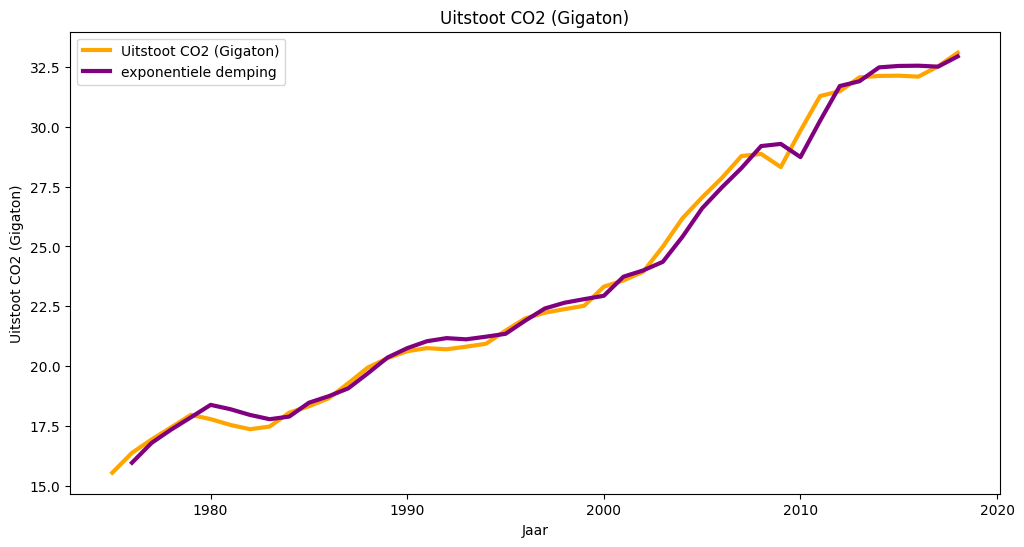

In [39]:
dataset['Uitstoot CO2 (Gigaton)'].plot(color='orange',linewidth=3,figsize=(12,6))
dataset['voorspelling exponentiele demping'].plot(color='purple',linewidth=3)
plt.legend(labels = ['Uitstoot CO2 (Gigaton)', 'exponentiele demping'])
plt.title("Uitstoot CO2 (Gigaton)")
plt.xlabel(dataset.index.name)
plt.ylabel(dataset.columns[0])

In [40]:
# 1. Trendlijnwaarde voor 2019
trend_2019 = regressionline.predict(np.array([[2019]]))[0]

# 2. Laatste voorspelde residu
laatste_residuprog = dataset['exponentiele demping'].iloc[-1]

# 3. Voorspelling uitstoot 2019
voorspelling_2019 = trend_2019 + laatste_residuprog
print(f"De voorspelling voor 2019 is ongeveer {voorspelling_2019:.2f} gigaton CO2.")


De voorspelling voor 2019 is ongeveer 33.36 gigaton CO2.


In [ ]:
dataset['trendlijn'] = dataset.index*regressionline.coef_[0] + regressionline.intercept_
dataset.head()

,Uitstoot CO2 (Gigaton),trendlijn
Jaar,,
1975,15.54,14.504697
1976,16.37,14.921973
1977,16.93,15.339249
1978,17.44,15.756526
1979,17.96,16.173802


Verwijder de trend uit de data zodat je de residuen bekomt.

In [ ]:
dataset['residuen'] = dataset['Uitstoot CO2 (Gigaton)'] - dataset['trendlijn']
dataset.head()

,Uitstoot CO2 (Gigaton),trendlijn,residuen
Jaar,,,
1975,15.54,14.504697,1.035303
1976,16.37,14.921973,1.448027
1977,16.93,15.339249,1.590751
1978,17.44,15.756526,1.683474
1979,17.96,16.173802,1.786198


Maak een plot van de residuen en controleer of de residuen stationair zijn via het toevoegen van een trendlijn

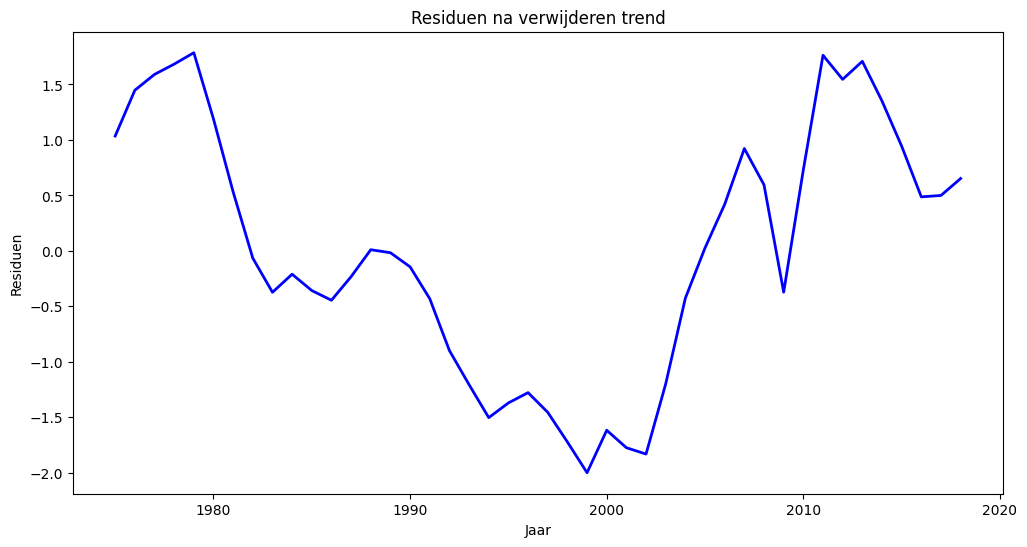

In [ ]:
# 6. Maak een plot van de residuen
dataset['residuen'].plot(color='blue', linewidth=2, figsize=(12,6))
plt.title('Residuen na verwijderen trend')
plt.xlabel('Jaar')
plt.ylabel('Residuen')
plt.show()

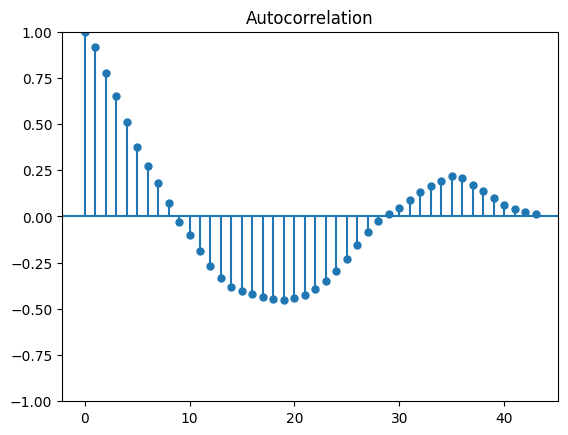

In [ ]:
fig = plot_acf(dataset['residuen'],lags=len(dataset) -1,alpha=None)

Gebruik moving average en exponentiële demping om het residu van 2019 te voorspellen. Voorspel ook eenvoudigweg op basis van de trendlijn. Zoek de optimale alpha wanneer je gebruik maakt van exponentiele demping. Kies de beste voorspellingsmethode op basis van de MAE (Mean Average Error).

The lowest MAE is:  0.34353090122425756 index: 
alpha:  1.0
The lowest MAE is:  0.34353090122425756 index: 
alpha:  1.0


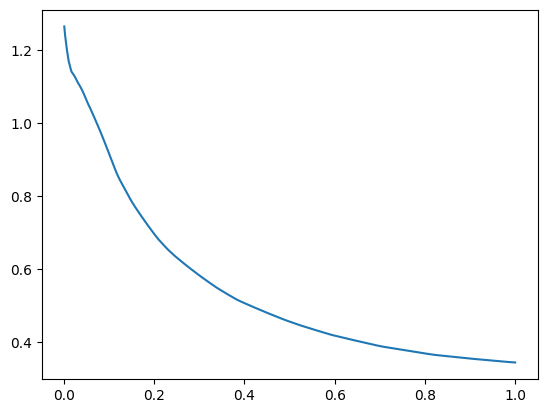

In [ ]:
step = 1e-3
alphas = np.arange(start=0,stop=1+step,step = step)
df = pd.DataFrame()
mae =  []
for alpha in alphas[1:]:
  exponential = []
  exponential = dataset['residuen'].ewm(alpha=alpha,adjust=False).mean().shift(1)
  mae.append(abs(dataset['residuen'] - exponential).mean())

df['mae'] = mae
df.set_index(alphas[1:],inplace=True)
df.index.name = 'Alpha'

minimum_mae = df['mae'].min()
print("The lowest MAE is: ", minimum_mae, "index: ")
print("alpha: ", df[df['mae'] == minimum_mae].index[0])
beste_alpha = df[df['mae'] == minimum_mae].index[0]  # <-- deze regel toevoegen!
print("The lowest MAE is: ", minimum_mae, "index: ")
print("alpha: ", beste_alpha)

plt.plot(df['mae'])


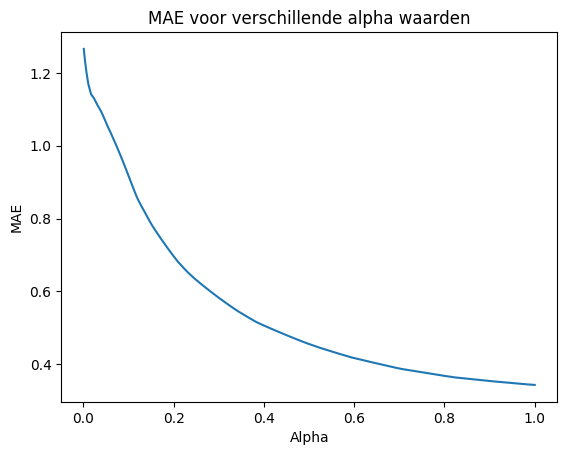

In [ ]:
# Plot MAE
plt.plot(df['mae'])
plt.title('MAE voor verschillende alpha waarden')
plt.xlabel('Alpha')
plt.ylabel('MAE')
plt.show()


Voeg de trend opnieuw toe aan de beste voorspelling

In [ ]:
dataset['exponentiele demping'] = dataset['residuen'].ewm(alpha=beste_alpha,adjust=False).mean().shift(1)
dataset.head()

,Uitstoot CO2 (Gigaton),trendlijn,residuen,exponentiele demping,absolute fout exponentiele demping,voorspelling exponentiele demping
Jaar,,,,,,
1975,15.54,14.504697,1.035303,NaN,NaN,NaN
1976,16.37,14.921973,1.448027,1.035303,0.412724,15.957276
1977,16.93,15.339249,1.590751,1.448027,0.413664,16.516336
1978,17.44,15.756526,1.683474,1.590751,0.364281,17.075719
1979,17.96,16.173802,1.786198,1.683474,0.341863,17.618137


In [ ]:
dataset['absolute fout exponentiele demping'] = abs(dataset['residuen'] - dataset['exponentiele demping'])
dataset.head()

,Uitstoot CO2 (Gigaton),trendlijn,residuen,exponentiele demping,absolute fout exponentiele demping,voorspelling exponentiele demping
Jaar,,,,,,
1975,15.54,14.504697,1.035303,NaN,NaN,NaN
1976,16.37,14.921973,1.448027,1.035303,0.412724,15.957276
1977,16.93,15.339249,1.590751,1.448027,0.142724,16.516336
1978,17.44,15.756526,1.683474,1.590751,0.092724,17.075719
1979,17.96,16.173802,1.786198,1.683474,0.102724,17.618137


In [ ]:
print(" De mean absolute error is",round(dataset['absolute fout exponentiele demping'].mean(),2))

 De mean absolute error is 0.34


In [ ]:
dataset['voorspelling exponentiele demping'] = dataset['trendlijn'] + dataset['exponentiele demping']
dataset.head()

,Uitstoot CO2 (Gigaton),trendlijn,residuen,exponentiele demping,absolute fout exponentiele demping,voorspelling exponentiele demping
Jaar,,,,,,
1975,15.54,14.504697,1.035303,NaN,NaN,NaN
1976,16.37,14.921973,1.448027,1.035303,0.412724,15.957276
1977,16.93,15.339249,1.590751,1.448027,0.142724,16.787276
1978,17.44,15.756526,1.683474,1.590751,0.092724,17.347276
1979,17.96,16.173802,1.786198,1.683474,0.102724,17.857276


Maak een grafiek van de tijdreeks samen met de voorspellingslijn.

Text(0, 0.5, 'Uitstoot CO2 (Gigaton)')

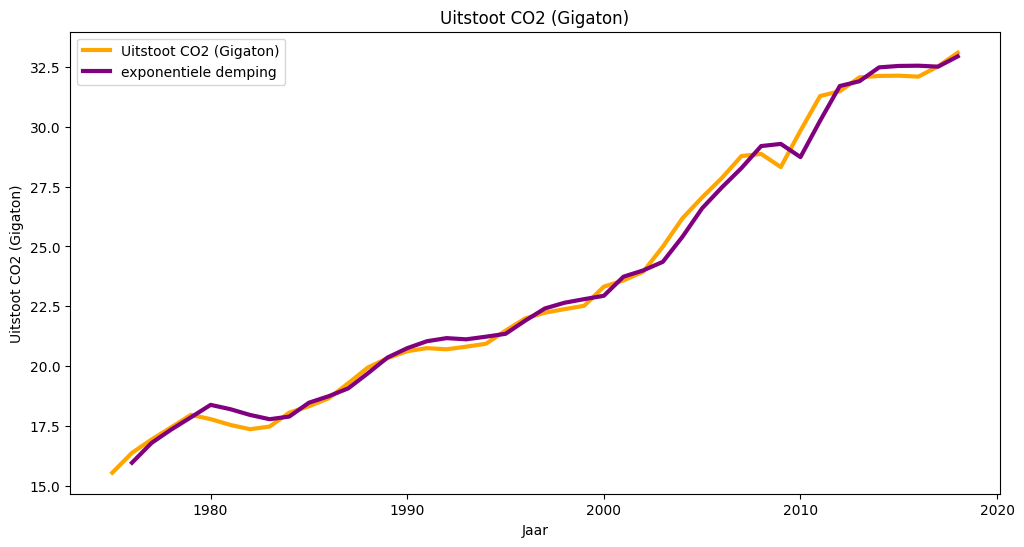

In [ ]:
dataset['Uitstoot CO2 (Gigaton)'].plot(color='orange',linewidth=3,figsize=(12,6))
dataset['voorspelling exponentiele demping'].plot(color='purple',linewidth=3)
plt.legend(labels = ['Uitstoot CO2 (Gigaton)', 'exponentiele demping'])
plt.title("Uitstoot CO2 (Gigaton)")
plt.xlabel(dataset.index.name)
plt.ylabel(dataset.columns[0])

In [ ]:
# 1. Trendlijnwaarde voor 2019
trend_2019 = regressionline.predict(np.array([[2019]]))[0]

# 2. Laatste voorspelde residu
laatste_residuprog = dataset['exponentiele demping'].iloc[-1]

# 3. Voorspelling uitstoot 2019
voorspelling_2019 = trend_2019 + laatste_residuprog
print(f"De voorspelling voor 2019 is ongeveer {voorspelling_2019:.2f} gigaton CO2.")


De voorspelling voor 2019 is ongeveer 33.36 gigaton CO2.


## <span style="color:deeppink"> alcohol sales </span>
De winst op verkoop van alcohol stijgt jaar na jaar. In het tabblad alcohol sales kan je de verkoop per maand zien sinds 1992 in miljoen dollar. (bron: https://fred.stlouisfed.org/series/S4248SM144NCEN#0)

Lees het bestand `alcohol sales.csv` in, gebruik de eerste kolom als index



In [92]:
dataset = pd.read_csv('/content/alcohol sales.csv',index_col= 'id')
dataset.head()

,date,Month,sales (million dollar)
id,,,
0,1/01/1992,January,3459
1,1/02/1992,February,3458
2,1/03/1992,March,4002
3,1/04/1992,April,4564
4,1/05/1992,May,4221


In [74]:
dataset.index = pd.to_datetime(dataset.index)

Maak een grafiek van deze tijdreeks

Text(0, 0.5, 'sales(million dollar)')

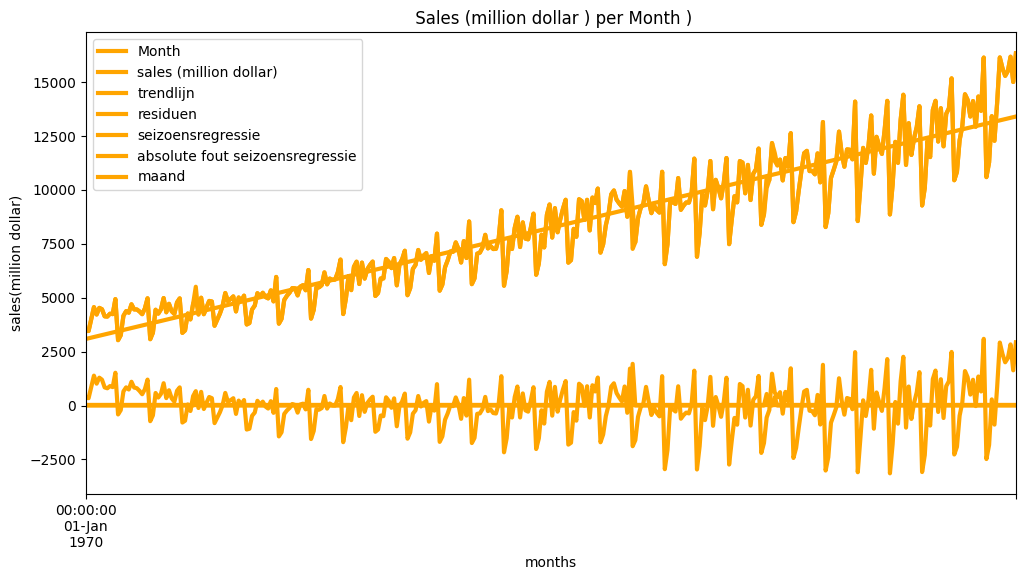

In [77]:
dataset.plot(color='orange',linewidth=3,figsize=(12,6))
plt.title(' Sales (million dollar ) per Month )')
plt.xlabel("months")
plt.ylabel("sales(million dollar)")

Bepaal de trend in de tijdreeks en geef de vergelijking ervan.

Gebruik seizoensregressie om een voorspelling van de sales van elke maand in 2021 te doen.
1.	Verwijder eerst de trend.
2.	Bepaal het gemiddelde van de residuen van elke maand.
3.	Voorspel het aantal verkopen van elke maand aan de hand van seizoensregressie.
4.	Wat is de MAE?


In [78]:
from sklearn import datasets,linear_model
x =  dataset.index.values.astype(float)
y = dataset['sales (million dollar)'].values
regressionline = linear_model.LinearRegression()
regressionline.fit(x.reshape(-1,1),y)

print('Intercept =', regressionline.intercept_ )
print('Richtingscoëfficiënt = ', regressionline.coef_[0])

Intercept = 3089.042502387776
Richtingscoëfficiënt =  29.733465983786378


<Axes: xlabel='id'>

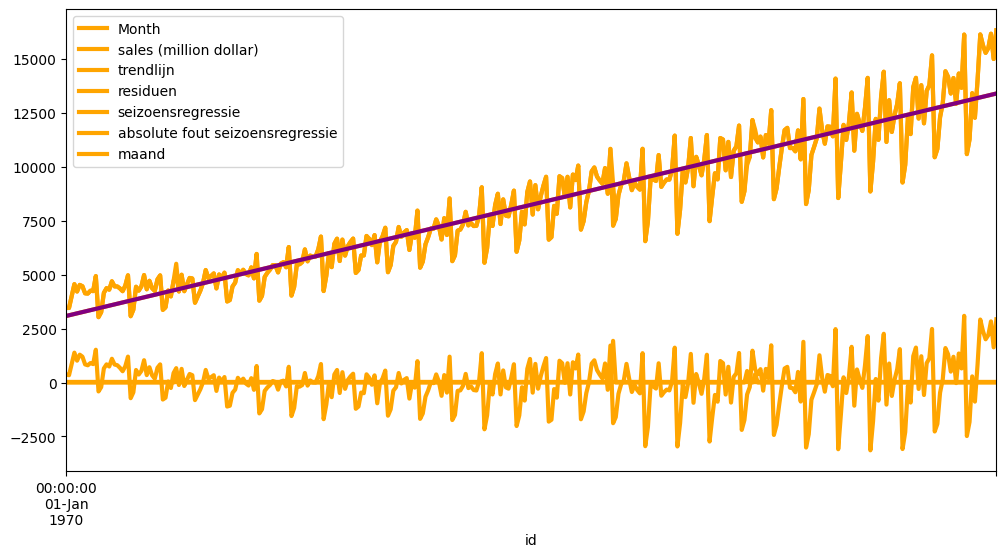

In [79]:
dataset.plot(color='orange',linewidth=3,figsize=(12,6))
sns.lineplot(x=x,y=regressionline.predict(x.reshape(-1,1)),color='purple',linewidth=3)

In [83]:
# Voeg trendlijn toe aan de dataset
dataset['trendlijn'] = x * regressionline.coef_[0] + regressionline.intercept_
dataset.head()

,date,Month,sales (million dollar),trendlijn,residuen,seizoensregressie,absolute fout seizoensregressie,maand
id,,,,,,,,
1970-01-01 00:00:00.000000000,1/01/1992,1,3459,3089.042502,369.957498,3459.0,0.0,1
1970-01-01 00:00:00.000000001,1/02/1992,1,3458,3118.775968,339.224032,3458.0,0.0,1
1970-01-01 00:00:00.000000002,1/03/1992,1,4002,3148.509434,853.490566,4002.0,0.0,1
1970-01-01 00:00:00.000000003,1/04/1992,1,4564,3178.242900,1385.757100,4564.0,0.0,1
1970-01-01 00:00:00.000000004,1/05/1992,1,4221,3207.976366,1013.023634,4221.0,0.0,1


In [84]:
# 4. Verwijder de trend: Bereken de residuen
dataset['residuen'] = dataset['sales (million dollar)'] - dataset['trendlijn']
dataset.head()


,date,Month,sales (million dollar),trendlijn,residuen,seizoensregressie,absolute fout seizoensregressie,maand
id,,,,,,,,
1970-01-01 00:00:00.000000000,1/01/1992,1,3459,3089.042502,369.957498,3459.0,0.0,1
1970-01-01 00:00:00.000000001,1/02/1992,1,3458,3118.775968,339.224032,3458.0,0.0,1
1970-01-01 00:00:00.000000002,1/03/1992,1,4002,3148.509434,853.490566,4002.0,0.0,1
1970-01-01 00:00:00.000000003,1/04/1992,1,4564,3178.242900,1385.757100,4564.0,0.0,1
1970-01-01 00:00:00.000000004,1/05/1992,1,4221,3207.976366,1013.023634,4221.0,0.0,1


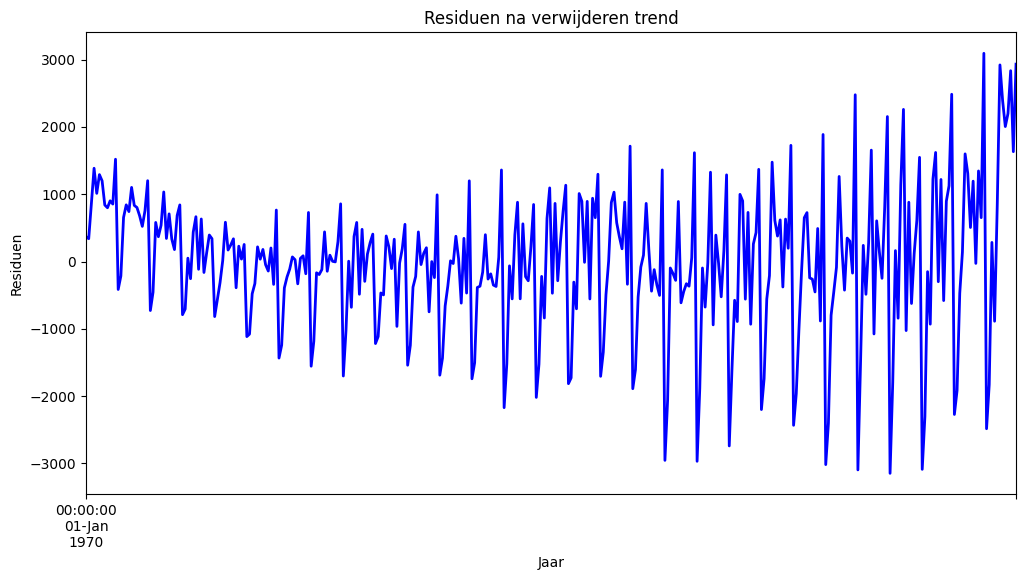

In [85]:
# 6. Maak een plot van de residuen
dataset['residuen'].plot(color='blue', linewidth=2, figsize=(12,6))
plt.title('Residuen na verwijderen trend')
plt.xlabel('Jaar')
plt.ylabel('Residuen')
plt.show()

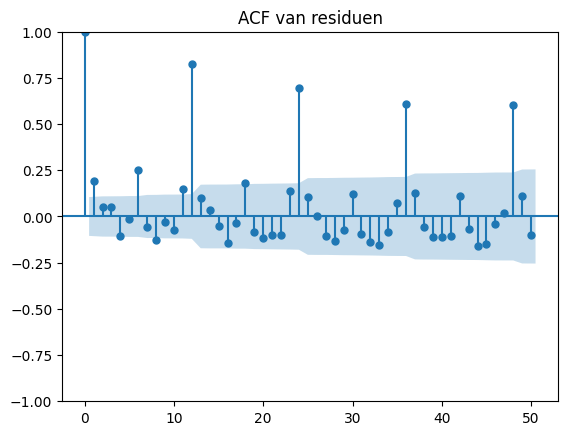

In [86]:
# 6. ACF plot van de residuen
plot_acf(dataset['residuen'], lags=50)
plt.title('ACF van residuen')
plt.show()

In [87]:
# 7. Maak een maand-kolom
dataset['maand'] = dataset.index.month
dataset.head()

,date,Month,sales (million dollar),trendlijn,residuen,seizoensregressie,absolute fout seizoensregressie,maand
id,,,,,,,,
1970-01-01 00:00:00.000000000,1/01/1992,1,3459,3089.042502,369.957498,3459.0,0.0,1
1970-01-01 00:00:00.000000001,1/02/1992,1,3458,3118.775968,339.224032,3458.0,0.0,1
1970-01-01 00:00:00.000000002,1/03/1992,1,4002,3148.509434,853.490566,4002.0,0.0,1
1970-01-01 00:00:00.000000003,1/04/1992,1,4564,3178.242900,1385.757100,4564.0,0.0,1
1970-01-01 00:00:00.000000004,1/05/1992,1,4221,3207.976366,1013.023634,4221.0,0.0,1


In [88]:
gemiddelde_residuen_per_maand = dataset.groupby('maand')['residuen'].mean()
print("Gemiddelde residuen per maand:")
print(gemiddelde_residuen_per_maand)


Gemiddelde residuen per maand:
maand
1    1.254475e-13
Name: residuen, dtype: float64


In [89]:

seizoensvoorspelling = []
for i in range(len(dataset)):
    maand = dataset.iloc[i]['maand']
    voorspelling = dataset.iloc[i]['trendlijn'] + gemiddelde_residuen_per_maand[maand]
    seizoensvoorspelling.append(voorspelling)

dataset['seizoensregressie'] = seizoensvoorspelling
dataset.head()

,date,Month,sales (million dollar),trendlijn,residuen,seizoensregressie,absolute fout seizoensregressie,maand
id,,,,,,,,
1970-01-01 00:00:00.000000000,1/01/1992,1,3459,3089.042502,369.957498,3089.042502,0.0,1
1970-01-01 00:00:00.000000001,1/02/1992,1,3458,3118.775968,339.224032,3118.775968,0.0,1
1970-01-01 00:00:00.000000002,1/03/1992,1,4002,3148.509434,853.490566,3148.509434,0.0,1
1970-01-01 00:00:00.000000003,1/04/1992,1,4564,3178.242900,1385.757100,3178.242900,0.0,1
1970-01-01 00:00:00.000000004,1/05/1992,1,4221,3207.976366,1013.023634,3207.976366,0.0,1


In [90]:

# 10. Bereken de absolute fout en de MAE
dataset['absolute fout seizoensregressie'] = abs(dataset['sales (million dollar)'] - dataset['seizoensregressie'])
print("De mean absolute error is:", round(dataset['absolute fout seizoensregressie'].mean(), 2))

De mean absolute error is: 793.92


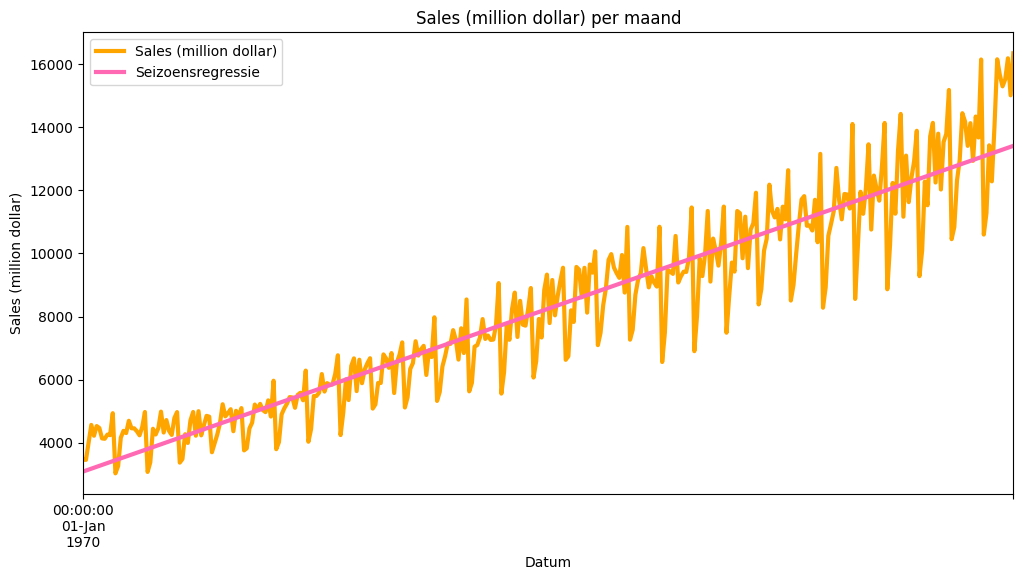

In [91]:
# 11. Maak een grafiek van echte verkoop vs voorspelling
dataset['sales (million dollar)'].plot(color='orange', linewidth=3, figsize=(12,6))
dataset['seizoensregressie'].plot(color='hotpink', linewidth=3)
plt.legend(labels = ['Sales (million dollar)', 'Seizoensregressie'])
plt.title("Sales (million dollar) per maand")
plt.xlabel('Datum')
plt.ylabel('Sales (million dollar)')
plt.show()

## <span style="color:deeppink"> toerisme </span>
Deze dataset bevat het  het aantal overnachtingen (in hotel, gastenkamers, campings,…) in Vlaanderen tijdens een bepaalde maand van een bepaald jaar. Gedetailleerde info per provincie kan je trouwens vinden op https://www.toerismevlaanderen.be  
Laad de dataset `toerisme.csv` in, gebruik de eerste kolom Datum als index

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from sklearn import linear_model

# Dataset laden
dataset = pd.read_csv('/content/toerisme.csv', index_col='Datum')

# Kolomnamen opschonen (spaties verwijderen)
dataset.columns = dataset.columns.str.strip()

# Maanden NL -> EN vervangen
maanden = {
    'januari': 'January', 'februari': 'February', 'maart': 'March', 'april': 'April',
    'mei': 'May', 'juni': 'June', 'juli': 'July', 'augustus': 'August',
    'september': 'September', 'oktober': 'October', 'november': 'November', 'december': 'December'
}

# Index (datum) omzetten
dataset.index = dataset.index.to_series().replace(maanden, regex=True)
dataset.index = pd.to_datetime(dataset.index, format='%B %Y')

# Controle
print(dataset.head())


            Jaar     Maand  Aantal maanden na januari 2014  \
Datum                                                        
2014-01-01  2014   januari                               0   
2014-02-01  2014  februari                               1   
2014-03-01  2014     maart                               2   
2014-04-01  2014     april                               3   
2014-05-01  2014       mei                               4   

            Aantal overnachtingen  
Datum                              
2014-01-01                1162818  
2014-02-01                1450616  
2014-03-01                1876276  
2014-04-01                2358104  
2014-05-01                2360854  


Plot de grafiek van het aantal overnachtingen, bepaal de trend in de tijdsreeks & geef de vergelijking ervan.

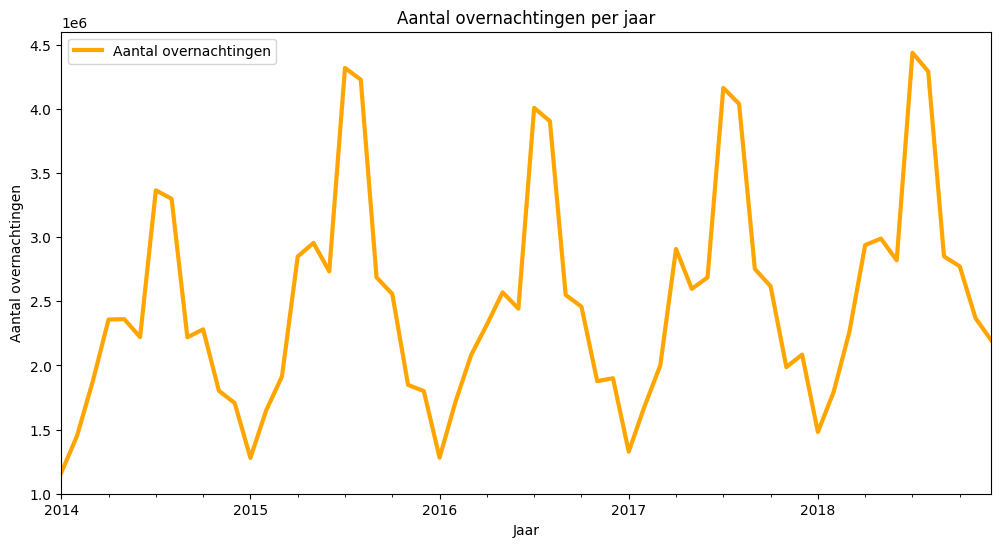

In [121]:
# 3. Plot aantal overnachtingen
dataset.plot(y='Aantal overnachtingen', color='orange', linewidth=3, figsize=(12,6))
plt.title('Aantal overnachtingen per jaar')
plt.xlabel("Jaar")
plt.ylabel("Aantal overnachtingen")
plt.show()

Zoek een optimale techniek voor het voorspellen van de volgende sample. Je kan kiezen uit alle technieken die tot nu toe aan bod zijn gekomen:
- Volgende sample is huidige sample
- Moving average met verschillende groottes
- Exponentiële demping. Zorg dat je de optimale alfa kan vinden.
- Seizoensregressie

Welke techniek werkt het best bij deze dataset?  
Plot de echte waarde en de waarden van de voorspellingstechniek op dezelfde grafiek

In [122]:
# 4. Lineaire regressie (trendlijn bepalen)
x = np.array([d.toordinal() for d in dataset.index])
y = dataset['Aantal overnachtingen'].values

regressionline = linear_model.LinearRegression()
regressionline.fit(x.reshape(-1,1), y)

print('Intercept =', regressionline.intercept_)
print('Richtingscoëfficiënt =', regressionline.coef_[0])


Intercept = -287736996.3469351
Richtingscoëfficiënt = 394.27553358288066


In [125]:
# 5. Trendlijn toevoegen aan dataset
dataset['trendlijn'] = regressionline.predict(x.reshape(-1,1))


<ipython-input-126-860129fe42a9>:3: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(dataset.index, dataset['trendlijn'], color='purple', linewidth=3)


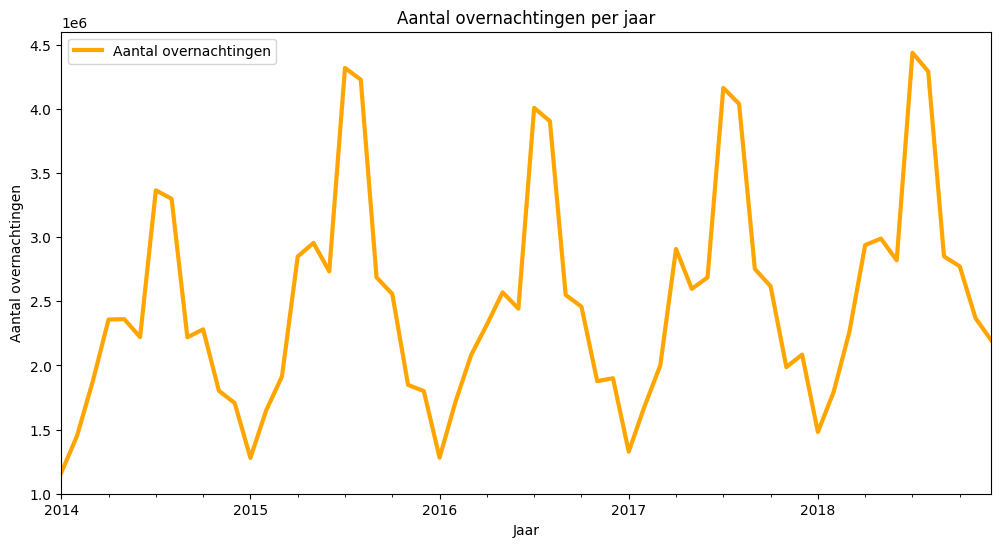

In [126]:
# 6. Plot met trendlijn
dataset.plot(y='Aantal overnachtingen', color='orange', linewidth=3, figsize=(12,6))
plt.plot(dataset.index, dataset['trendlijn'], color='purple', linewidth=3)
plt.title('Aantal overnachtingen per jaar')
plt.xlabel("Jaar")
plt.ylabel("Aantal overnachtingen")
plt.show()


In [127]:
# 7. Residuen berekenen
dataset['residuen'] = dataset['Aantal overnachtingen'] - dataset['trendlijn']

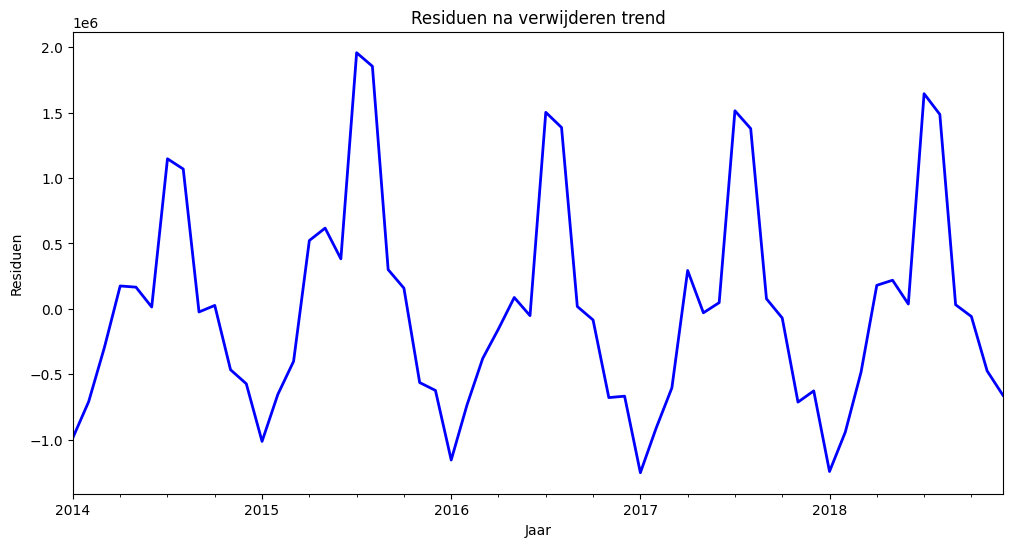

In [128]:
# 8. Plot van residuen
dataset['residuen'].plot(color='blue', linewidth=2, figsize=(12,6))
plt.title('Residuen na verwijderen trend')
plt.xlabel('Jaar')
plt.ylabel('Residuen')
plt.show()

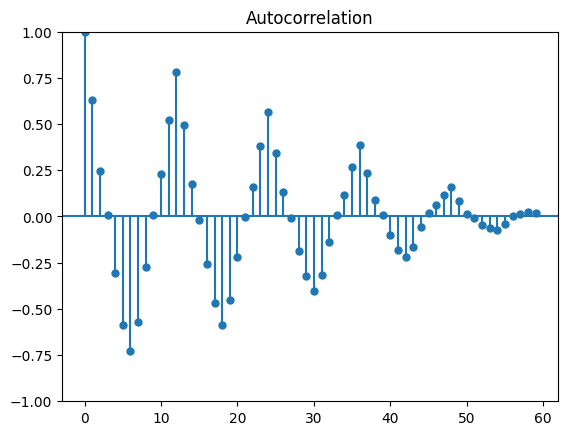

In [129]:
# 9. Autocorrelatie plot
plot_acf(dataset['residuen'], lags=len(dataset)-1, alpha=None)
plt.show()


In [130]:
# 10. Exponentiële demping: beste alpha zoeken
step = 1e-3
alphas = np.arange(start=0, stop=1+step, step=step)
df = pd.DataFrame()
mae = []

for alpha in alphas[1:]:
    exponential = dataset['residuen'].ewm(alpha=alpha, adjust=False).mean().shift(1)
    mae.append(abs(dataset['residuen'] - exponential).mean())

df['mae'] = mae
df.set_index(alphas[1:], inplace=True)
df.index.name = 'Alpha'

beste_alpha = df['mae'].idxmin()
print(f"Beste alpha: {beste_alpha}")

Beste alpha: 0.982


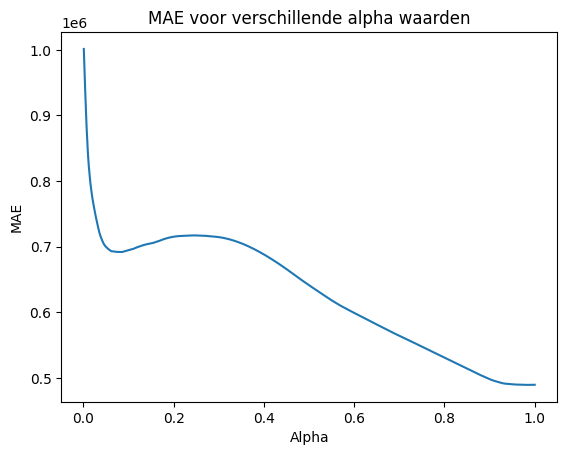

In [131]:
# 11. Plot MAE vs alpha
plt.plot(df['mae'])
plt.title('MAE voor verschillende alpha waarden')
plt.xlabel('Alpha')
plt.ylabel('MAE')
plt.show()

In [132]:
# 12. Exponentiële demping toepassen
dataset['exponentiele demping'] = dataset['residuen'].ewm(alpha=beste_alpha, adjust=False).mean().shift(1)

In [133]:
# 13. Absolute fout van exponentiële demping
dataset['absolute fout exponentiele demping'] = abs(dataset['residuen'] - dataset['exponentiele demping'])

print("De mean absolute error is", round(dataset['absolute fout exponentiele demping'].mean(), 2))


De mean absolute error is 489214.85


In [134]:
# 14. Voorspelling maken
dataset['voorspelling exponentiele demping'] = dataset['trendlijn'] + dataset['exponentiele demping']


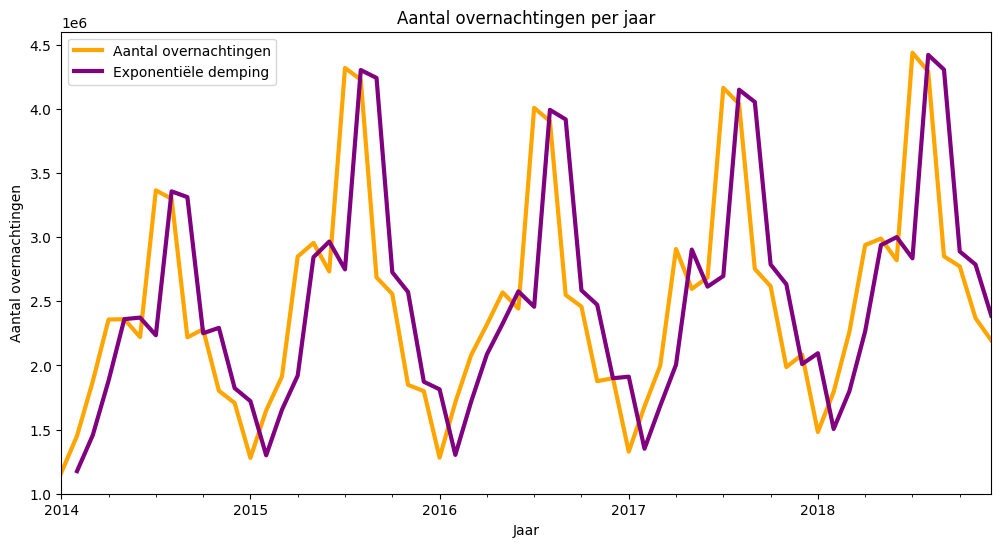

In [135]:
# 15. Plot echte vs voorspelling
dataset.plot(y='Aantal overnachtingen', color='orange', linewidth=3, figsize=(12,6))
dataset['voorspelling exponentiele demping'].plot(color='purple', linewidth=3)
plt.legend(labels=['Aantal overnachtingen', 'Exponentiële demping'])
plt.title("Aantal overnachtingen per jaar")
plt.xlabel("Jaar")
plt.ylabel("Aantal overnachtingen")
plt.show()


In [136]:

# 16. Voorspelling volgende sample
# Stel je wil voorspellen voor een toekomstige maand, bijvoorbeeld januari 2025
nieuwe_datum = pd.to_datetime('2025-01-01')
nieuwe_ordinal = nieuwe_datum.toordinal()

trend_overnachtingen = regressionline.predict(np.array([[nieuwe_ordinal]]))[0]
laatste_residuprog = dataset['exponentiele demping'].iloc[-1]
voorspelling_overnachting = trend_overnachtingen + laatste_residuprog

print(f"De voorspelling voor overnachtingen in januari 2025 is ongeveer {voorspelling_overnachting:.2f} aantal.")

De voorspelling voor overnachtingen in januari 2025 is ongeveer 3265003.25 aantal.
